In [1]:
import glob
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.feature import hog

In [2]:
vehicle_image_arr = glob.glob('./Downloads/balls/*.jpg')
len(vehicle_image_arr)

3692

In [20]:
vehicle_images = []
dim = (64,64)
for i in vehicle_image_arr:
    readimage = cv2.imread(i)
    read = cv2.resize(readimage,dim)
    rgbimage = cv2.cvtColor(read , cv2.COLOR_BGR2RGB)
    vehicle_images.append(rgbimage)

In [21]:
non_vehicle_image_arr = glob.glob('./Downloads/empty/*.jpg')
len(non_vehicle_image_arr)

3797

In [22]:
dim = (64,64)
non_vehicle_images = []
for i in non_vehicle_image_arr:
    readimage = cv2.imread(i)
    read = cv2.resize(readimage,dim)
    rgbimage = cv2.cvtColor(read , cv2.COLOR_BGR2RGB)
    non_vehicle_images.append(rgbimage)

In [23]:
print("No. of images loaded : "+ str(len(vehicle_image_arr)))
print("No. of non-images loaded : "+ str(len(non_vehicle_image_arr)))

No. of images loaded : 3692
No. of non-images loaded : 3797


Shape of Vehicle Image : (64, 64, 3)
Shape of Non Vehicle Image : (64, 64, 3)


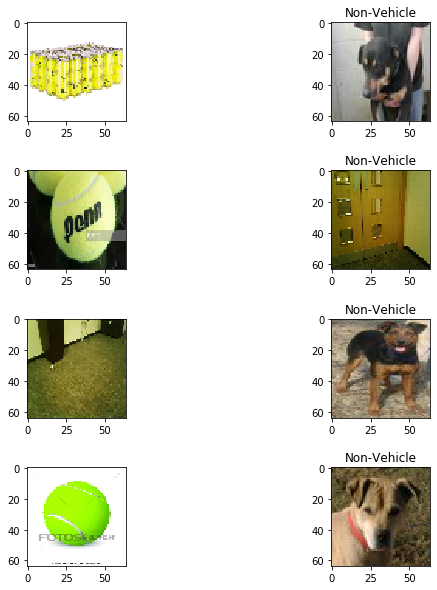

In [24]:
f , axes = plt.subplots(4,2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for index in range(4):
    vehicle = random.randint(0 , len(vehicle_images)-1)
    non_vehicle = random.randint(0 , len(non_vehicle_images)-1)
    axes[index,0].imshow(vehicle_images[vehicle])
    axes[index,1].set_title("Vehicle")
    axes[index,1].imshow(non_vehicle_images[non_vehicle])
    axes[index,1].set_title("Non-Vehicle")
    
print("Shape of Vehicle Image : "+str(vehicle_images[vehicle].shape))
print("Shape of Non Vehicle Image : "+str(non_vehicle_images[non_vehicle].shape))

In [25]:
def extractcolorhistogram(image , nbins=32 , bins_range=(0,255), resize=None):
    if(resize != None):
        image = cv2.resize(image,resize)
    zero_channel = np.histogram(image[:,:,0] , bins = nbins, range=bins_range)
    first_channel = np.histogram(image[:,:,1] , bins = nbins, range=bins_range)
    second_channel = np.histogram(image[:,:,2] , bins = nbins, range=bins_range)
    return zero_channel , first_channel , second_channel

In [26]:
def findbincenter(histogram_channel):
    bin_edges = histogram_channel[1]
    bin_centers = ( bin_edges[1:] + bin_edges[0:len(bin_edges)-1] )/2
    return bin_centers

In [27]:
def extractcolorfeatures(zero_channel , first_channel , second_channel):
    return np.concatenate((zero_channel[0],first_channel[0],second_channel[0]))

No of features are : 384


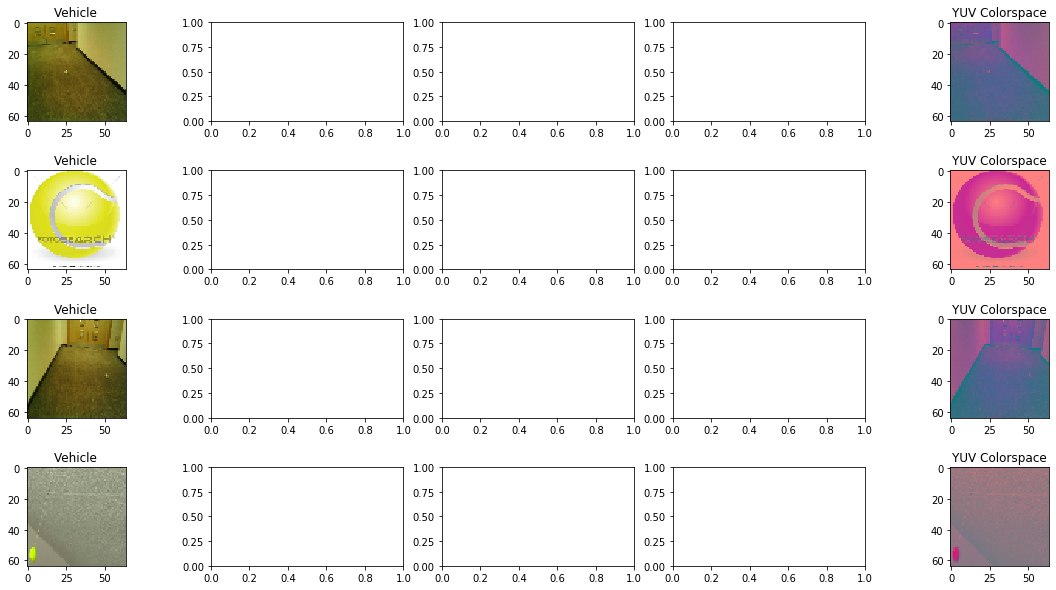

In [28]:
# Checking Color Features for Vehicles

f , axes = plt.subplots(4,5, figsize=(20,10))
f.subplots_adjust(hspace = 0.5)

for index in range(4):
    vehicle = random.randint(0 , len(vehicle_images)-1)
    non_vehicle = random.randint(0 , len(non_vehicle_images)-1)
    
    coloredimage = cv2.cvtColor(vehicle_images[vehicle],cv2.COLOR_RGB2YUV)
    r,g,b = extractcolorhistogram(coloredimage , 128)
    
    center = findbincenter(r)
    
    axes[index,0].imshow(vehicle_images[vehicle])
    axes[index,0].set_title("Vehicle")
    axes[index,4].imshow(coloredimage)
    axes[index,4].set_title("YUV Colorspace")
    
features = extractcolorfeatures(r,g,b)
print("No of features are : "+ str(len(features)))

## Same we can do for non-vehicles

In [29]:
def spatialbinningfeatures(image,size):
    image = cv2.resize(image,size)
    return image.ravel()

In [30]:
featurelist = spatialbinningfeatures(vehicle_images[1],(16,16))
print("No. of features before spatial binning : ",len(vehicle_images[1].ravel()))
print("No. of features after spatial binning : ",len(featurelist))

No. of features before spatial binning :  12288
No. of features after spatial binning :  768


In [31]:
def getfeaturefromhog(image , orient , cellsperblock , pixelspercell , visualise = False , feature_vector_flag = True):
    if(visualise==True):
        hog_features , hog_image = hog(image , orientations=orient , pixels_per_cell = (pixelspercell , pixelspercell) , 
                                      cells_per_block = (cellsperblock,cellsperblock) , visualise=True,
                                      feature_vector = feature_vector_flag)
        return hog_features, hog_image
    else:
        hog_features= hog(image , orientations=orient , pixels_per_cell = (pixelspercell , pixelspercell) , 
                                      cells_per_block = (cellsperblock,cellsperblock) , visualise=False,
                                      feature_vector = feature_vector_flag)
        return hog_features

Feature Vector length returned is :  324
No of features that can be extracted from image :  4096


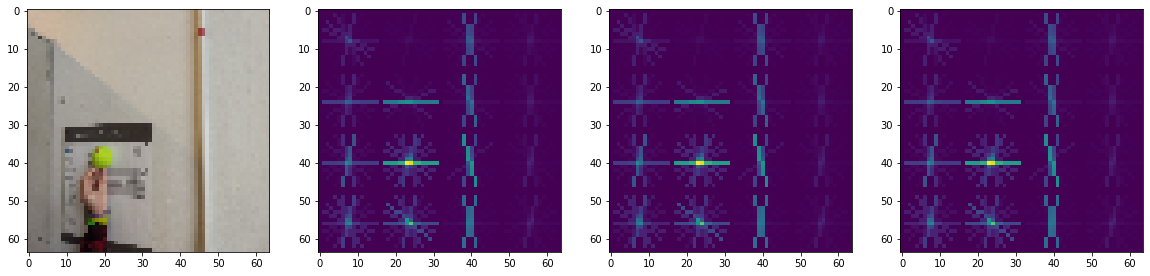

In [88]:
image = vehicle_images[333]
image = cv2.cvtColor(image , cv2.COLOR_RGB2YUV)
image_channel_0 = image[:,:,0]
image_channel_1 = image[:,:,0]
image_channel_2 = image[:,:,0]

feature_0 , hog_img_0 = getfeaturefromhog(image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_1 , hog_img_1 = getfeaturefromhog(image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_2 , hog_img_2 = getfeaturefromhog(image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)

f, axes = plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(vehicle_images[333])
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)

print("Feature Vector length returned is : ",len(feature_0))
print("No of features that can be extracted from image : ",len(hog_img_0.ravel()))

In [33]:
def convertimagecolorspace(image,colorspace):
    return cv2.cvtColor(image,colorspace)

In [34]:
def extractfeatures(images,orientation,cellsperblock,pixelspercell,convertcolorspace=False):
    featurelist = []
    imagelist = []
    for image in images:
        if(convertcolorspace == True):
            image = cv2.cvtColor(image , cv2.COLOR_RGB2YUV)
        local_features_1=getfeaturefromhog(image[:,:,0],orientation,cellsperblock,pixelspercell,False,True)
        local_features_2=getfeaturefromhog(image[:,:,1],orientation,cellsperblock,pixelspercell,False,True)
        local_features_3=getfeaturefromhog(image[:,:,2],orientation,cellsperblock,pixelspercell,False,True)
        
        x=np.hstack((local_features_1,local_features_2,local_features_3))
        featurelist.append(x)
    return featurelist

## Extracting the features from the dataset

In [35]:
%%time

orientations = 9
cellsperblock = 2
pixelsperblock = 16
convertcolorspace = True
vehiclefeatures = extractfeatures(vehicle_images,orientations,cellsperblock,pixelsperblock,convertcolorspace)
nonvehiclefeatures = extractfeatures(non_vehicle_images,orientations,cellsperblock,pixelsperblock,convertcolorspace)

Wall time: 16.7 s


In [36]:
featureslist = np.vstack([vehiclefeatures,nonvehiclefeatures])
print("Shape of features list is : ",featurelist.shape)
labellist = np.concatenate([np.ones(len(vehiclefeatures)) , np.zeros(len(nonvehiclefeatures))])
print("Shape of label list is : ",labellist.shape)

Shape of features list is :  (768,)
Shape of label list is :  (7489,)


## DATA PREPROCESSING

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(featureslist,labellist,test_size=0.2,shuffle=True)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
%%time

from sklearn.svm import LinearSVC
classifier1 = LinearSVC()
classifier1.fit(x_train , y_train)
print("Accuracy of SVC is : ", classifier1.score(x_test,y_test))

Accuracy of SVC is :  0.9339118825100133
Wall time: 2.69 s


## To Draw boxes

In [40]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
   
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    
    window_list = []
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
     
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,windows_y):
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

In [41]:
def drawcars(image , windows , convertColorspace = False):
    refinedwindows = []
    for window in windows:
        start = window[0]
        end = window[1]
        clippedimage = image[start[1]:end[1] , start[0]:end[0]]
        if(clippedimage.shape[1] == clippedimage.shape[0] and clippedimage.shape[1]!=0):
            clippedimage = cv2.resize(clippedimage, (64,64))
            f1 = extractfeatures([clippedimage], 9, 2, 16, convertColorspace)
            predictedoutput = classifier1.predict([f1[0]])
            if(predictedoutput == 1):
                refinedwindows.append(window)
                
    return refinedwindows

In [42]:
import matplotlib.image as mpimg

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    
    for bbox in bboxes:
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        color=(r, g, b)
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

Total No of windows are  470


D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated 

D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)
D:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


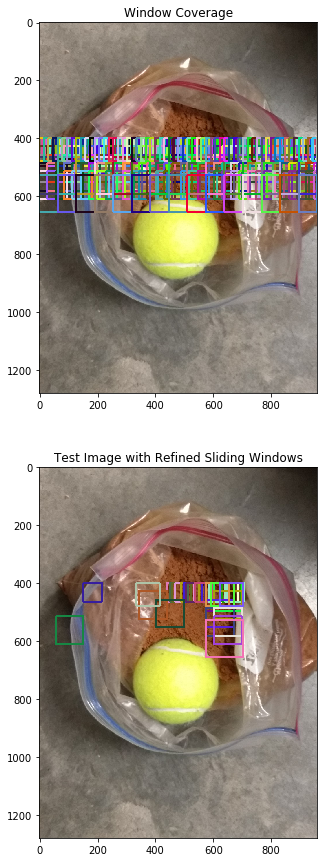

In [90]:
import matplotlib.image as mpimg
image = mpimg.imread('./Downloads/test/56.jpg')

windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,464], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows4 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,480], 
                    xy_window=(80,80), xy_overlap=(0.2, 0.2))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,612], 
                    xy_window=(96,96), xy_overlap=(0.3, 0.3))
windows3 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,660], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))
refinedWindows=drawcars(image,windows, True)



f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)

## To get more accurate result

In [91]:
# Applying HeatMap

def addheat(heatmap , bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
        
    return heatmap

In [92]:
def applythreshold(heatmap,threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

In [93]:
from scipy.ndimage.measurements import label

def drawlabeledboxes(img,labels):
    for carnumber in range(1, labels[1]+1):
        nonzero = (labels[0] == carnumber).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        bbox = ((np.min(nonzerox),np.min(nonzeroy)) , (np.max(nonzerox) , np.max(nonzeroy)))
        cv2.rectangle(img ,bbox[0] ,bbox[1], [0,0,255], 6 )
        
    return img

No. of cars found :  3


Text(0.5, 1.0, 'After Applying HeatMap')

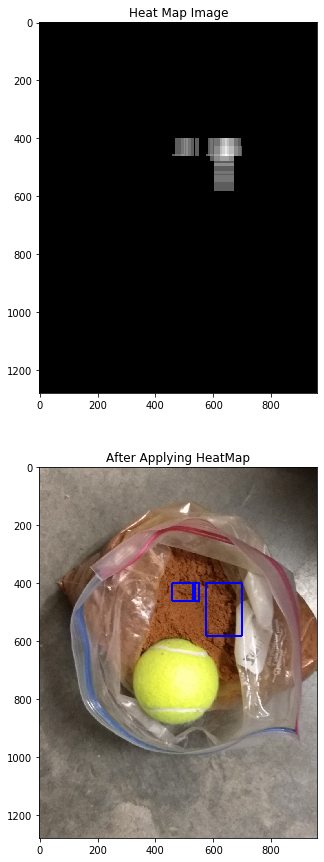

In [94]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = addheat(heat , refinedWindows)
heat = applythreshold(heat,3)
heatmap = np.clip(heat , 0 , 255)
heatimage = heatmap

labels = label(heatmap)
print("No. of cars found : ",labels[1])
drawimg = drawlabeledboxes(np.copy(image) , labels)

f,axes = plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(heatimage,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(drawimg)
axes[1].set_title("After Applying HeatMap")